<a href="https://colab.research.google.com/github/VanshikaNehra23/News_Group/blob/main/News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING** **DATA**

In [1]:
import pandas as pd
import os
import re
import numpy as np
from sklearn.datasets import fetch_20newsgroups

In [2]:
data = fetch_20newsgroups(subset='train')

In [ ]:
data

In [5]:
names= data.target_names
names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [6]:
df = pd.DataFrame.from_dict(data, orient='index')

In [7]:
df=df.transpose()
df

,data,filenames,target_names,target,DESCR
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,/root/scikit_learn_data/20news_home/20news-byd...,alt.atheism,7,.
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,/root/scikit_learn_data/20news_home/20news-byd...,comp.graphics,4,.
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,/root/scikit_learn_data/20news_home/20news-byd...,comp.os.ms-windows.misc,4,
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,/root/scikit_learn_data/20news_home/20news-byd...,comp.sys.ibm.pc.hardware,1,_
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,/root/scikit_learn_data/20news_home/20news-byd...,comp.sys.mac.hardware,14,2
...,...,...,...,...,...
11309,From: jim.zisfein@factory.com (Jim Zisfein) \n...,/root/scikit_learn_data/20news_home/20news-byd...,None,13,None
11310,From: ebodin@pearl.tufts.edu\nSubject: Screen ...,/root/scikit_learn_data/20news_home/20news-byd...,None,4,None
11311,From: westes@netcom.com (Will Estes)\nSubject:...,/root/scikit_learn_data/20news_home/20news-byd...,None,3,None
11312,From: steve@hcrlgw (Steven Collins)\nSubject: ...,/root/scikit_learn_data/20news_home/20news-byd...,None,1,None


In [8]:
y=df['target']
y

0         7
1         4
2         4
3         1
4        14
         ..
11309    13
11310     4
11311     3
11312     1
11313     8
Name: target, Length: 11314, dtype: object

In [9]:
x=df.drop(axis=1,columns=['DESCR','target','target_names','filenames'])
x

,data
0,From: lerxst@wam.umd.edu (where's my thing)\nS...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...
...,...
11309,From: jim.zisfein@factory.com (Jim Zisfein) \n...
11310,From: ebodin@pearl.tufts.edu\nSubject: Screen ...
11311,From: westes@netcom.com (Will Estes)\nSubject:...
11312,From: steve@hcrlgw (Steven Collins)\nSubject: ...


**REMOVING \t AND \n**

In [10]:
def remove(myString):
  myString = re.sub(r"[\n\t]*", "", myString)
  return myString

In [11]:
x['data']=x['data'].apply(lambda x: remove(x))[0]

**WEB SCRAPING**

In [12]:
import requests
from bs4 import BeautifulSoup
url="https://www.sciencenews.org/article/black-hole-picture-magnetic-fields-event-horizon-telescope"
r=requests.get(url)
htmlContent=r.content
soup = BeautifulSoup(htmlContent, 'html.parser')
i=0
f = open("test1.txt", "w")
for data in soup.find_all("p"):
    print()
    if i<7 and i>4:
      sum = data.get_text()
      f.writelines(sum+'\n')
    if i>7:
      break      
    i+=1

f.close()

In [17]:
testing=pd.DataFrame(columns=['categories','articles'])

**CONVERTING DATA INTO DATAFRAME**

In [18]:
opener=open('/content/test1.txt','r')
testing['articles']=['','','','','']
c=0
for i in opener:
  testing['articles'][c]=i
  c=c+1
  print(i)
opener=open('/content/test2.txt','r') #One word text
for i in opener:
  testing['articles'][c]=i
  c=c+1
  print(i)
testing

Astronomers have gotten their first glimpse of the magnetic fields tangled around a black hole.

The Event Horizon Telescope has unveiled the magnetism of the hot, glowing gas around the supermassive black hole at the heart of galaxy M87, researchers report in two studies published online March 24 in the Astrophysical Journal Letters. These magnetic fields are thought to play a crucial role in how the black hole scarfs down matter and launches powerful plasma jets thousands of light-years into space (SN: 3/29/19).

Telescope

Baseball

Doctor


,categories,articles
0,NaN,Astronomers have gotten their first glimpse of...
1,NaN,The Event Horizon Telescope has unveiled the m...
2,NaN,Telescope\n
3,NaN,Baseball\n
4,NaN,Doctor


In [19]:
testing['categories']=['sci.space','sci.space','sci.space','rec.sport.baseball','sci.med']

In [20]:
testing['target_num']=[15,15,15,10,14]

In [21]:
testing

,categories,articles,target_num
0,sci.space,Astronomers have gotten their first glimpse of...,15
1,sci.space,The Event Horizon Telescope has unveiled the m...,15
2,sci.space,Telescope\n,15
3,rec.sport.baseball,Baseball\n,10
4,sci.med,Doctor,14


In [22]:
data_test=testing['target_num']

In [23]:
data_test

0    15
1    15
2    15
3    10
4    14
Name: target_num, dtype: int64

In [24]:
testing['articles']=testing['articles'].apply(lambda x: remove(x)) #Removing \t and \n

In [25]:
testing

,categories,articles,target_num
0,sci.space,Astronomers have gotten their first glimpse of...,15
1,sci.space,The Event Horizon Telescope has unveiled the m...,15
2,sci.space,Telescope,15
3,rec.sport.baseball,Baseball,10
4,sci.med,Doctor,14


In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM,Embedding
from tensorflow.keras.models import Model

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

**TOKENIZATION**

In [27]:
MAX_VOCAB_SIZE=20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(x['data'])

In [28]:
sequence_train=tokenizer.texts_to_sequences(x['data'])
sequence_test=tokenizer.texts_to_sequences(testing['articles'])

In [29]:
word2idx=tokenizer.word_index
V=len(word2idx)
print("Found %s unique tokens." %V)

Found 93 unique tokens.


In [30]:
data_train=pad_sequences(sequence_train)
print("Shape of data train tensor: ",data_train.shape)
T=data_train.shape[1]

Shape of data train tensor:  (11314, 125)


**MODEL**

In [31]:
D=20
M=15
i=Input(shape=(T,))
x=Embedding(V+1,D)(i)
x=LSTM(M,return_sequences=True)(x)
x=GlobalMaxPooling1D()(x)
x=Dense(20,activation='softmax')(x)
model=Model(i,x)

In [32]:
model.compile(
        loss='sparse_categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

In [33]:
y=np.array(y)

In [34]:
y=y.astype('float32')

In [35]:
y_test=testing['target_num']

In [36]:
y_test=np.asarray(y_test).astype('float32')

In [40]:
print("Training model....")
r=model.fit(
data_train,
y,
epochs=10,
validation_data=(data_test,y_test))

Training model....
Epoch 1/10
354/354 [==============================] - 12s 35ms/step - loss: 2.9913 - accuracy: 0.0493 - val_loss: 2.9770 - val_accuracy: 0.0000e+00
Epoch 2/10
354/354 [==============================] - 12s 34ms/step - loss: 2.9911 - accuracy: 0.0497 - val_loss: 2.9678 - val_accuracy: 0.0000e+00
Epoch 3/10
354/354 [==============================] - 13s 37ms/step - loss: 2.9911 - accuracy: 0.0507 - val_loss: 2.9708 - val_accuracy: 0.0000e+00
Epoch 4/10
354/354 [==============================] - 13s 37ms/step - loss: 2.9910 - accuracy: 0.0487 - val_loss: 2.9716 - val_accuracy: 0.0000e+00
Epoch 5/10
354/354 [==============================] - 13s 37ms/step - loss: 2.9911 - accuracy: 0.0513 - val_loss: 2.9717 - val_accuracy: 0.0000e+00
Epoch 6/10
354/354 [==============================] - 13s 37ms/step - loss: 2.9911 - accuracy: 0.0505 - val_loss: 2.9724 - val_accuracy: 0.0000e+00
Epoch 7/10
354/354 [==============================] - 13s 37ms/step - loss: 2.9911 - accuracy

**GRAPHS**

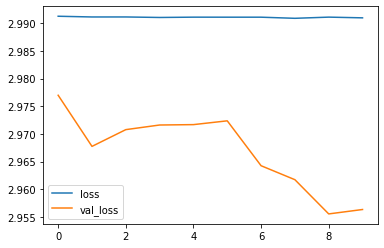

In [41]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

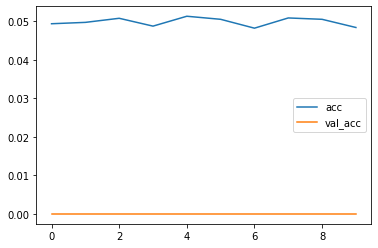

In [42]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

**SAVING THE MODEL**

In [43]:
import h5py
model.save("model.h5")
model.save_weights("weights.h5")

In [44]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

# later...

# load json and create model


Saved model to disk


In [45]:
from keras.models import model_from_json

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json,{"tf":tf})
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk
